In [392]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from Adrian_config import eia_key
from pprint import pprint


In [393]:
energy_data_raw_df=pd.read_csv("owid-energy-data.csv")

energy_data_raw_df=energy_data_raw_df.loc[(energy_data_raw_df["year"] >= 2018) & (energy_data_raw_df["year"] <= 2023)]

energy_data_raw_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18,ASEAN (Ember),2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647,NaN,NaN,NaN,NaN,NaN,3.47,NaN,0.327,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224,NaN,NaN,NaN,NaN,NaN,5.91,NaN,0.531,NaN
20,ASEAN (Ember),2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.826,NaN,NaN,NaN,NaN,NaN,5.79,NaN,0.526,NaN
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.130,NaN,NaN,NaN,NaN,NaN,7.63,NaN,0.666,NaN
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.086,NaN,NaN,NaN,NaN,NaN,13.09,NaN,1.086,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN


In [394]:
north_american_countries = [
    "United States", "Canada", "Mexico", "Guatemala", "Belize", "Honduras",
    "El Salvador", "Nicaragua", "Costa Rica", "Panama", "Bahamas", "Cuba",
    "Jamaica", "Haiti", "Dominican Republic"]


south_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

asian_countries=[ "China","Japan", "North Korea", "Mongolia", "Taiwan",]


In [395]:
North_American_Countries_df = energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(north_american_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption"]
]
North_American_Countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1942,Bahamas,2018,401911.0,1.32,NaN,NaN,2.00,2.00,NaN
1943,Bahamas,2019,404563.0,1.32,NaN,NaN,2.01,2.01,NaN
1944,Bahamas,2020,406478.0,1.33,NaN,NaN,2.02,2.02,NaN
1945,Bahamas,2021,407920.0,1.34,NaN,NaN,2.03,2.03,NaN
1946,Bahamas,2022,409989.0,1.34,NaN,NaN,2.03,2.03,NaN
...,...,...,...,...,...,...,...,...,...
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430


In [396]:
asian_countries_df=energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(asian_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption"]
]
asian_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,38677.414
10234,Japan,2018,1.262559e+08,564.50,7.653,5.137,1053.18,1053.18,4710.478
10235,Japan,2019,1.257917e+08,537.49,-6.931,4.781,1025.78,1025.78,4556.221
10236,Japan,2020,1.252448e+08,524.12,7.684,5.148,996.96,996.96,4189.554
10237,Japan,2021,1.246125e+08,518.55,-2.865,5.000,1019.71,1019.71,4316.124


In [426]:
south_american_countries_df = energy_data_raw_df.loc[energy_data_raw_df["country"].isin(south_american_countries),
    ["country","year","population","greenhouse_gas_emissions",
     "biofuel_cons_change_pct","biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
south_american_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1130,Argentina,2018,44413592.0,60.81,-4.524,17.594,156.34,146.780,855.356
1131,Argentina,2019,44745516.0,55.48,2.137,17.970,150.22,139.530,795.546
1132,Argentina,2020,45036032.0,57.09,-46.322,9.646,149.35,144.640,737.523
1133,Argentina,2021,45276788.0,62.33,8.019,10.420,155.65,153.150,824.284
1134,Argentina,2022,45510324.0,59.52,34.359,14.000,163.71,150.830,885.226
...,...,...,...,...,...,...,...,...,...
20984,Venezuela,2019,28971686.0,27.32,NaN,NaN,84.31,85.180,491.294
20985,Venezuela,2020,28490458.0,14.40,NaN,NaN,79.23,79.880,351.342
20986,Venezuela,2021,28199862.0,14.17,NaN,NaN,82.57,82.570,426.502
20987,Venezuela,2022,28301700.0,15.73,NaN,NaN,84.66,84.660,471.614


In [397]:
china_df=asian_countries_df.loc[asian_countries_df["country"]=="China",[
    "country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
    "biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']]

china_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,38677.414


In [425]:
brazil_df = south_american_countries_df.loc[energy_data_raw_df["country"]=="Brazil",
    ["country","year","population","greenhouse_gas_emissions",
     "biofuel_cons_change_pct","biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
brazil_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
3055,Brazil,2018,210166592.0,82.36,15.988,238.946,636.37,601.39,1857.108
3056,Brazil,2019,211782880.0,89.89,10.687,264.483,658.29,633.33,1838.441
3057,Brazil,2020,213196304.0,83.85,-6.896,246.243,653.48,628.76,1706.122
3058,Brazil,2021,214326224.0,110.26,-1.120,243.486,679.21,656.11,1930.015
3059,Brazil,2022,215313504.0,71.45,-0.631,241.951,690.08,677.17,1873.238
3060,Brazil,2023,216422448.0,70.14,9.969,266.070,726.09,713.18,1877.917


In [400]:
bahamas_df= North_American_Countries_df.loc[ North_American_Countries_df["country"]=="Bahamas",
                                            
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
bahamas_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1942,Bahamas,2018,401911.0,1.32,NaN,NaN,2.00,2.00,NaN
1943,Bahamas,2019,404563.0,1.32,NaN,NaN,2.01,2.01,NaN
1944,Bahamas,2020,406478.0,1.33,NaN,NaN,2.02,2.02,NaN
1945,Bahamas,2021,407920.0,1.34,NaN,NaN,2.03,2.03,NaN
1946,Bahamas,2022,409989.0,1.34,NaN,NaN,2.03,2.03,NaN


In [401]:

united_states_df=North_American_Countries_df.loc[North_American_Countries_df["country"]=='United States',
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
    "biofuel_consumption", "electricity_demand","electricity_generation","fossil_fuel_consumption"]]
united_states_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
20487,United States,2018,332140032.0,1827.70,-1.325,404.621,4246.01,4201.55,22212.854
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430
20492,United States,2023,339996576.0,1569.91,13.215,495.419,4266.69,4249.05,21102.203


In [402]:

united_states_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
20487,United States,2018,332140032.0,1827.70,-1.325,404.621,4246.01,4201.55,22212.854
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430
20492,United States,2023,339996576.0,1569.91,13.215,495.419,4266.69,4249.05,21102.203


In [403]:
united_states_df_lineg=united_states_df[united_states_df["country"] == "United States"][["year", "greenhouse_gas_emissions"]]
united_states_df_lineg


,year,greenhouse_gas_emissions
20487,2018,1827.70
20488,2019,1718.34
20489,2020,1565.52
20490,2021,1655.35
20491,2022,1654.66
20492,2023,1569.91


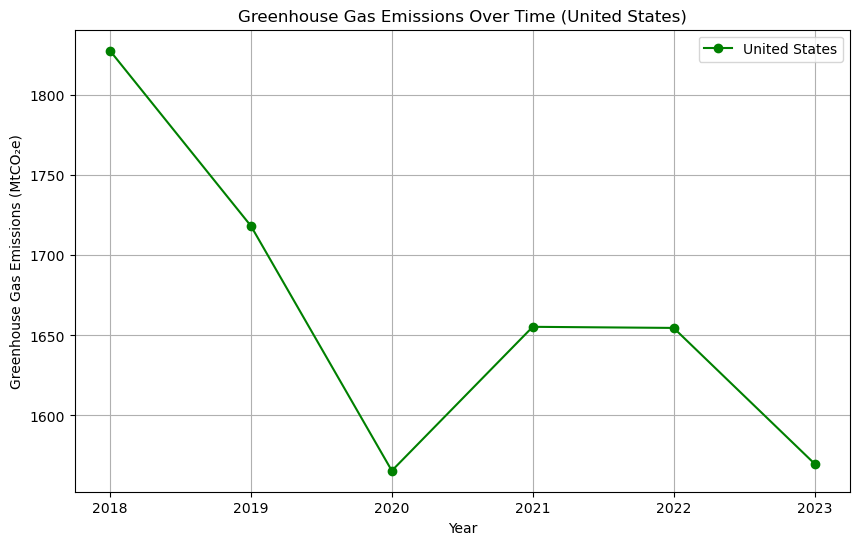

In [404]:

plt.figure(figsize=(10, 6))
plt.plot(united_states_df_lineg["year"], united_states_df_lineg["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label="United States")


plt.xlabel("Year")
plt.ylabel("Greenhouse Gas Emissions (MtCO₂e)")
plt.title("Greenhouse Gas Emissions Over Time (United States)")
plt.legend()
plt.grid(True)
plt.savefig("usagrnhs.png")
plt.show()

In [405]:
united_states_df_linef=united_states_df[united_states_df["country"] == "United States"][["year", "fossil_fuel_consumption"]]
united_states_df_linef

,year,fossil_fuel_consumption
20487,2018,22212.854
20488,2019,21948.141
20489,2020,19936.998
20490,2021,21170.129
20491,2022,21479.430
20492,2023,21102.203


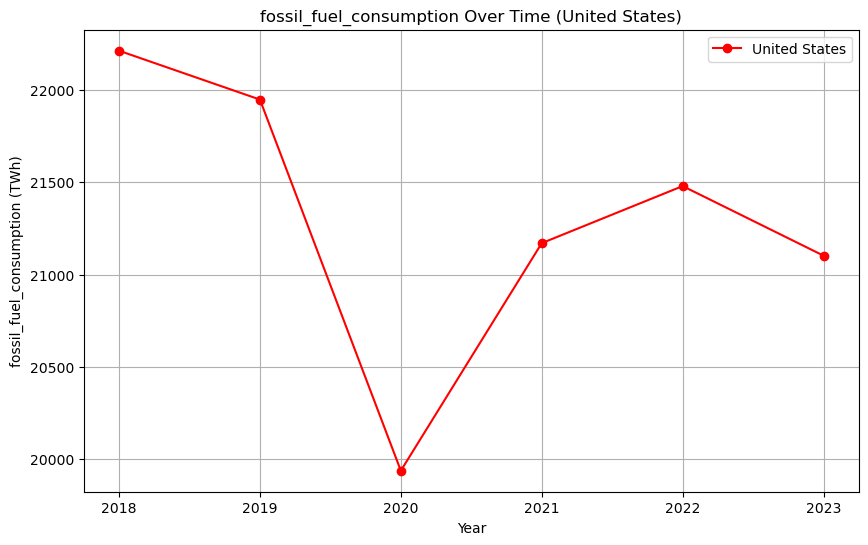

In [406]:
united_states_df_linef=united_states_df[united_states_df["country"] == "United States"][["year", "fossil_fuel_consumption"]]
plt.figure(figsize=(10, 6))
plt.plot(united_states_df_linef["year"], united_states_df_linef["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label="United States")


plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumption Over Time (United States)")
plt.legend()
plt.grid(True)

plt.savefig("usafossil.png")
plt.show()

In [407]:

united_states_df_line_el=united_states_df[united_states_df["country"] == "United States"][["year", "electricity_generation"]]
united_states_df_line_el

,year,electricity_generation
20487,2018,4201.55
20488,2019,4158.38
20489,2020,4043.18
20490,2021,4153.62
20491,2022,4286.91
20492,2023,4249.05


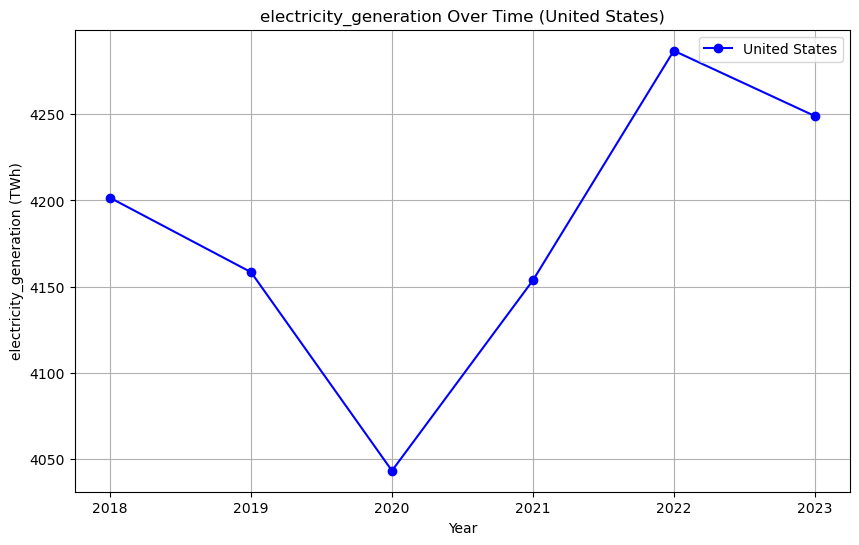

In [423]:

plt.figure(figsize=(10, 6))
plt.plot(united_states_df_line_el["year"], united_states_df_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label="United States")

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (United States)")
plt.legend()
plt.grid(True)

plt.savefig("usaelect.png")
plt.show()

In [409]:
china_line_grn=china_df[china_df["country"]=="China"][["year","greenhouse_gas_emissions"]]
china_line_grn

,year,greenhouse_gas_emissions
4500,2018,4563.94
4501,2019,4649.25
4502,2020,4716.12
4503,2021,5110.79
4504,2022,5183.77
4505,2023,5508.48


In [410]:
china_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,38677.414


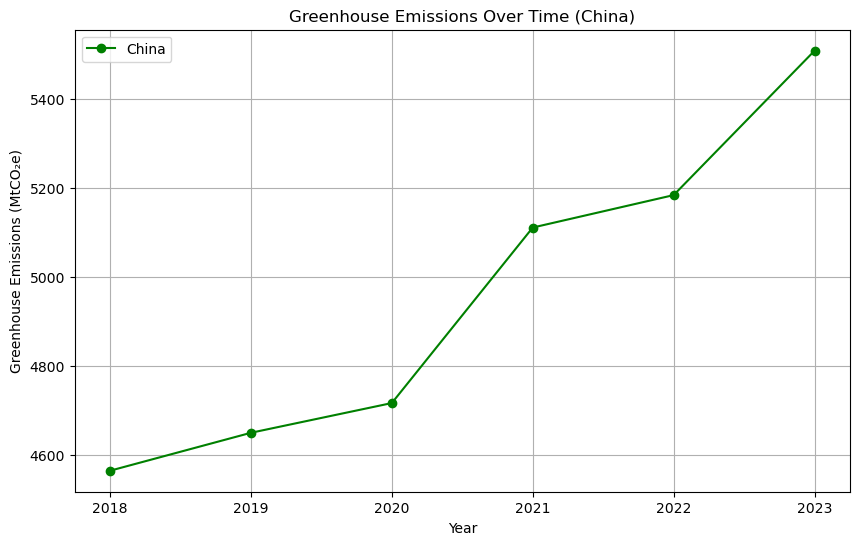

In [411]:
plt.figure(figsize=(10, 6))
plt.plot(china_line_grn["year"], china_line_grn["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label="China")

plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions (MtCO₂e)")
plt.title("Greenhouse Emissions Over Time (China)")
plt.legend()
plt.grid(True)

plt.savefig("chinagrnhs.png")
plt.show()

In [412]:
china_line_ff=china_df[china_df["country"]=="China"][["year","fossil_fuel_consumption"]]
china_line_ff

,year,fossil_fuel_consumption
4500,2018,32720.146
4501,2019,33897.516
4502,2020,34728.391
4503,2021,36292.246
4504,2022,36372.648
4505,2023,38677.414


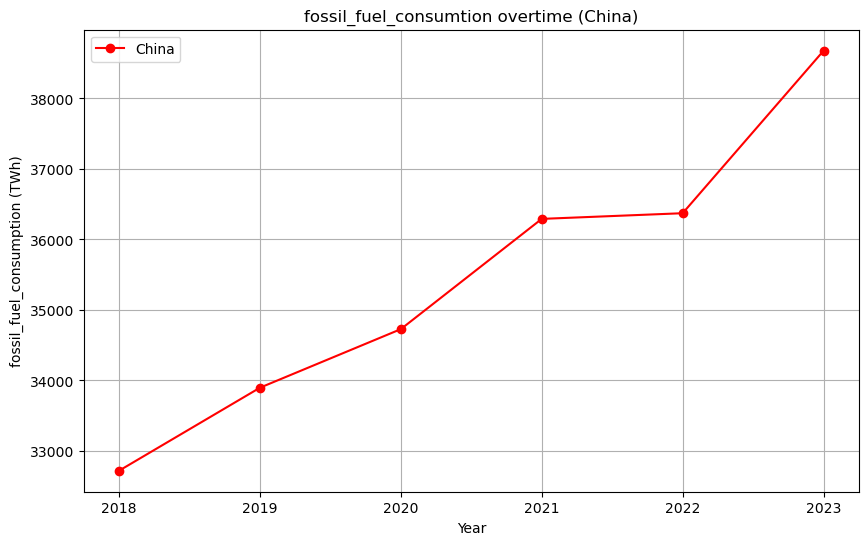

In [413]:
plt.figure(figsize=(10, 6))
plt.plot(china_line_ff["year"], china_line_ff["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label=("China"))

plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumtion overtime (China)")
plt.legend()
plt.grid(True)

plt.savefig("chinafossil.png")
plt.show()

In [414]:
china_line_el=china_df[china_df["country"]=="China"][["year","electricity_generation"]]
china_line_el

,year,electricity_generation
4500,2018,7166.14
4501,2019,7503.43
4502,2020,7779.07
4503,2021,8534.26
4504,2022,8848.73
4505,2023,9459.59


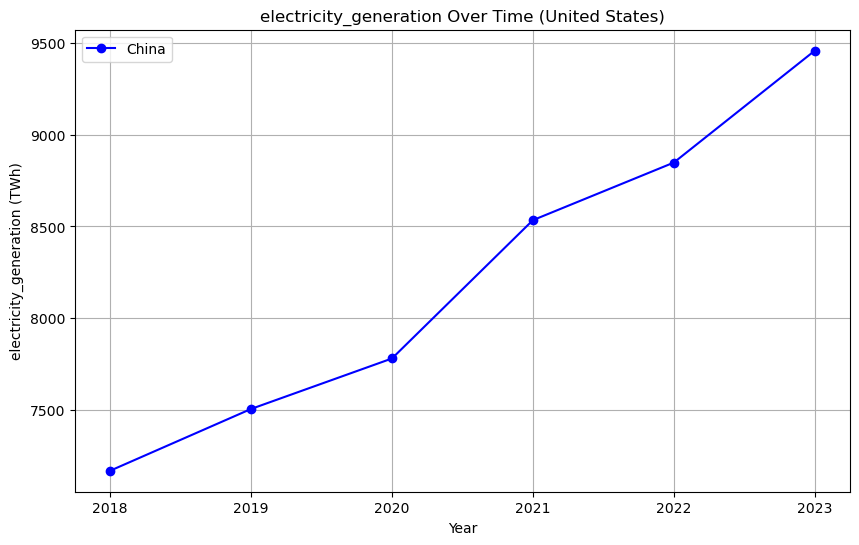

In [415]:

plt.figure(figsize=(10, 6))
plt.plot(china_line_el["year"], china_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label=("China"))

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (United States)")
plt.legend()
plt.grid(True)

plt.savefig("chinaele.png")
plt.show()


In [416]:
brazil_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
3055,Brazil,2018,210166592.0,82.36,15.988,238.946,636.37,601.39,1857.108
3056,Brazil,2019,211782880.0,89.89,10.687,264.483,658.29,633.33,1838.441
3057,Brazil,2020,213196304.0,83.85,-6.896,246.243,653.48,628.76,1706.122
3058,Brazil,2021,214326224.0,110.26,-1.120,243.486,679.21,656.11,1930.015
3059,Brazil,2022,215313504.0,71.45,-0.631,241.951,690.08,677.17,1873.238
3060,Brazil,2023,216422448.0,70.14,9.969,266.070,726.09,713.18,1877.917


In [417]:
brazil_line_gh=brazil_df[brazil_df["country"]=="Brazil"][["year","greenhouse_gas_emissions"]]
brazil_line_gh

,year,greenhouse_gas_emissions
3055,2018,82.36
3056,2019,89.89
3057,2020,83.85
3058,2021,110.26
3059,2022,71.45
3060,2023,70.14


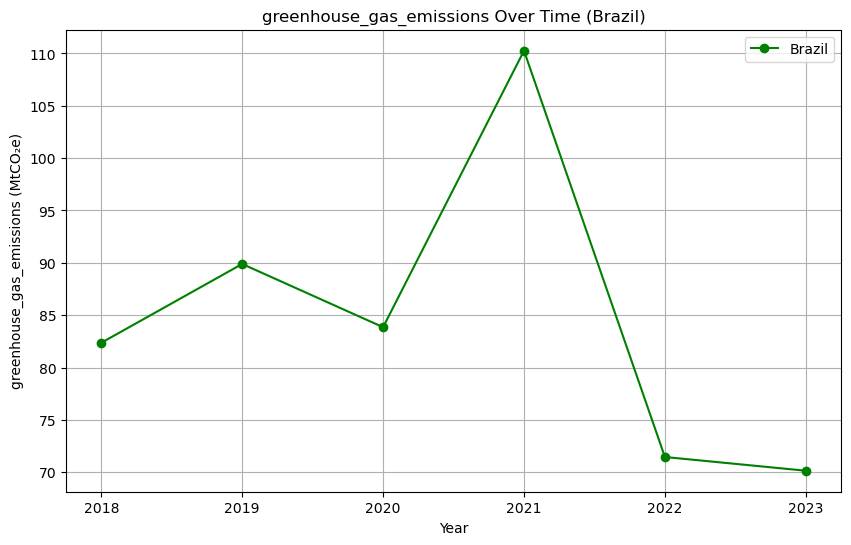

In [418]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_gh["year"], brazil_line_gh["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("greenhouse_gas_emissions (MtCO₂e)")
plt.title("greenhouse_gas_emissions Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilgrn.png")
plt.show()

In [419]:
brazil_line_ff=brazil_df[brazil_df["country"]=="Brazil"][["year","fossil_fuel_consumption"]]
brazil_line_ff

,year,fossil_fuel_consumption
3055,2018,1857.108
3056,2019,1838.441
3057,2020,1706.122
3058,2021,1930.015
3059,2022,1873.238
3060,2023,1877.917


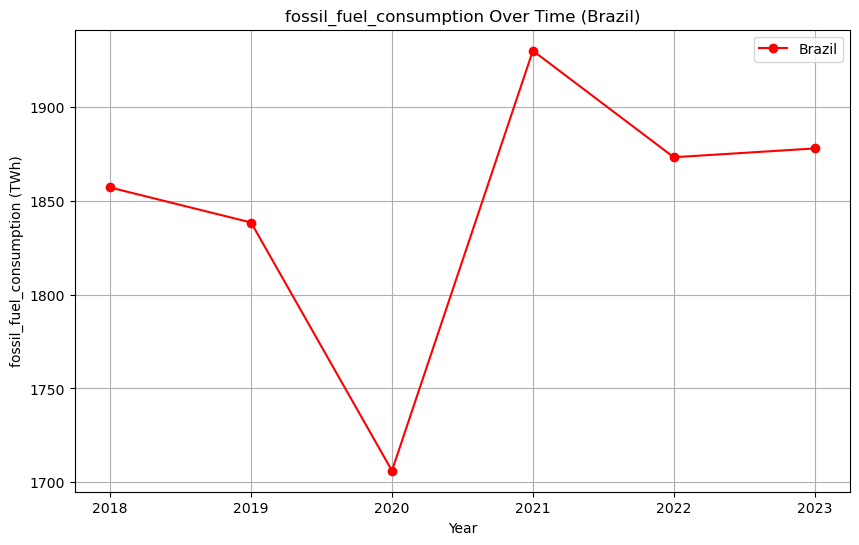

In [420]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_ff["year"], brazil_line_ff["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumption Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilfoss.png")
plt.show()

In [421]:
brazil_line_el=brazil_df[brazil_df["country"]=="Brazil"][["year","electricity_generation"]]
brazil_line_el

,year,electricity_generation
3055,2018,601.39
3056,2019,633.33
3057,2020,628.76
3058,2021,656.11
3059,2022,677.17
3060,2023,713.18


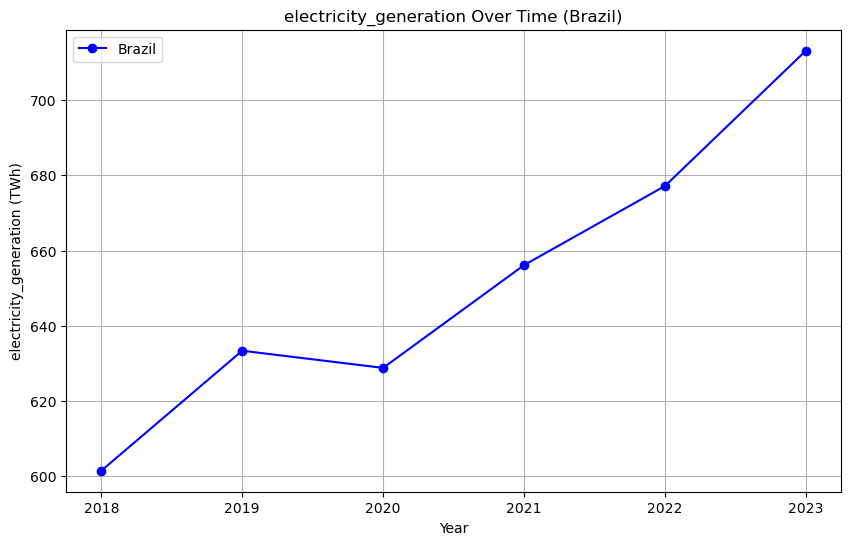

In [422]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_el["year"], brazil_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilel.png")
plt.show()